## Import requirements

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
import random
from sklearn.svm import SVC

/tmp/ipykernel_36212/2869056280.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Preparation

### Dataset understanding

In [3]:
data = pd.read_csv('/home/mehran/Projects/horse_survival/horse.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

### Column remover function:

In [5]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [6]:
labels = data['outcome']
samples = data.drop(columns=['outcome', 'cp_data', 'hospital_number'])

### Creating train and test data:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.1, random_state=1)

In [8]:
x_train

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3
85,no,adult,38.0,54.0,30.0,warm,reduced,pale_pink,3,mild_pain,...,NaN,distend_small,45.0,6.2,NaN,NaN,no,400,0,0
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,decreased,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0
132,no,adult,37.9,40.0,24.0,normal,normal,normal_pink,less_3_sec,depressed,...,NaN,firm,40.0,5.7,NaN,NaN,yes,400,0,0
285,no,adult,37.8,82.0,12.0,cool,normal,normal_pink,more_3_sec,severe_pain,...,NaN,NaN,50.0,7.0,NaN,NaN,yes,2205,0,0
131,no,adult,37.6,88.0,36.0,cool,normal,normal_pink,less_3_sec,mild_pain,...,NaN,NaN,44.0,6.0,NaN,NaN,yes,1400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,yes,adult,39.2,NaN,23.0,cool,normal,pale_pink,less_3_sec,severe_pain,...,NaN,NaN,36.0,6.6,clear,3.0,yes,3115,0,0
255,yes,adult,37.5,72.0,NaN,warm,normal,normal_pink,less_3_sec,depressed,...,normal,NaN,35.0,65.0,cloudy,2.0,yes,7209,0,0
72,yes,adult,37.7,56.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,2113,0,0
235,no,adult,38.2,42.0,26.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,normal,NaN,36.0,6.9,NaN,NaN,no,3111,0,0


In [9]:
x_train.isnull().sum()

surgery                    0
age                        0
rectal_temp               53
pulse                     22
respiratory_rate          54
temp_of_extremities       52
peripheral_pulse          61
mucous_membrane           43
capillary_refill_time     28
pain                      51
peristalsis               37
abdominal_distention      51
nasogastric_tube          95
nasogastric_reflux        97
nasogastric_reflux_ph    221
rectal_exam_feces         94
abdomen                  109
packed_cell_volume        24
total_protein             27
abdomo_appearance        149
abdomo_protein           178
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [10]:
x_test.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3
173,no,adult,NaN,NaN,NaN,cool,absent,dark_cyanotic,NaN,severe_pain,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,3400,0,0
287,yes,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,2124,0,0
51,yes,adult,37.4,84.0,36.0,normal,NaN,pale_pink,more_3_sec,mild_pain,...,absent,distend_large,NaN,NaN,serosanguious,NaN,yes,7209,0,0
146,no,adult,38.0,44.0,12.0,warm,normal,pale_pink,less_3_sec,mild_pain,...,normal,distend_small,33.0,6.5,NaN,NaN,yes,2209,0,0
214,yes,adult,37.8,40.0,12.0,normal,normal,normal_pink,less_3_sec,alert,...,normal,other,38.0,7.0,NaN,NaN,yes,3111,0,0


#### Percentage of the missing values for each feature:

In [11]:
(x_train.isnull().sum() / len(x_train)) * 100

surgery                   0.000000
age                       0.000000
rectal_temp              19.702602
pulse                     8.178439
respiratory_rate         20.074349
temp_of_extremities      19.330855
peripheral_pulse         22.676580
mucous_membrane          15.985130
capillary_refill_time    10.408922
pain                     18.959108
peristalsis              13.754647
abdominal_distention     18.959108
nasogastric_tube         35.315985
nasogastric_reflux       36.059480
nasogastric_reflux_ph    82.156134
rectal_exam_feces        34.944238
abdomen                  40.520446
packed_cell_volume        8.921933
total_protein            10.037175
abdomo_appearance        55.390335
abdomo_protein           66.171004
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
dtype: float64

## Visualization

In [21]:
numerical_features = list(set(x_train.select_dtypes(exclude='object').columns) - set(['lesion_1', 'lesion_2', 'lesion_3']))

In [30]:
def plot_distro(x=x_train, y=y_train, num_feat=numerical_features):
    num_cols = 2 

    num_rows = (len(num_feat) + 1) // num_cols

    # Create a figure with a specific size for subplots
    plt.figure(figsize=(12, 26)) 

    for i, feature in enumerate(numerical_features, start=1):
        plt.subplot(num_rows, num_cols, i) 
        sns.histplot(data=x, x=feature, hue=y, palette="YlGnBu", multiple="stack", kde=True, bins=30, shrink=0.9)
        plt.title(f'{feature} Distribution', fontsize=12, fontweight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

    return plt

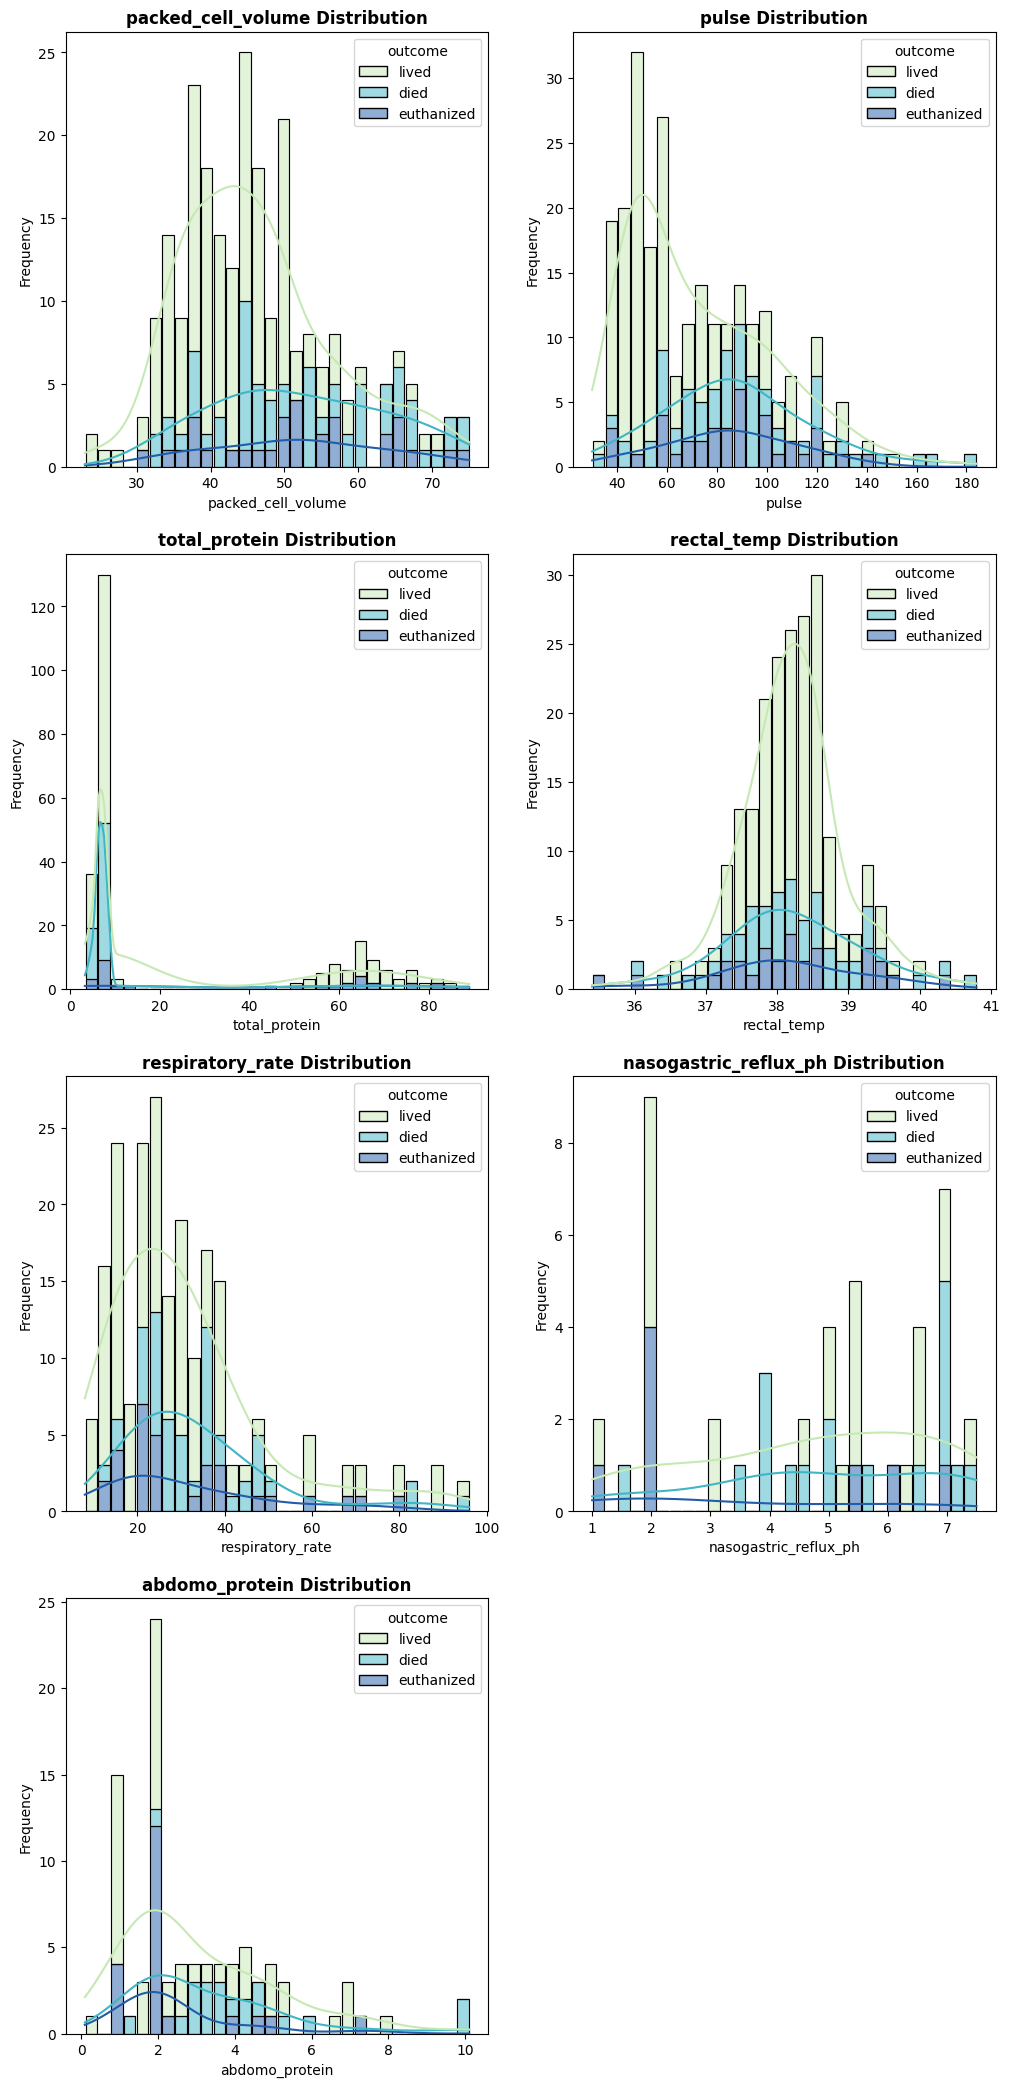

In [31]:
dist_plot = plot_distro(x_train, y_train, numerical_features)
dist_plot

In [11]:
data.select_dtypes(exclude=object)

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,0


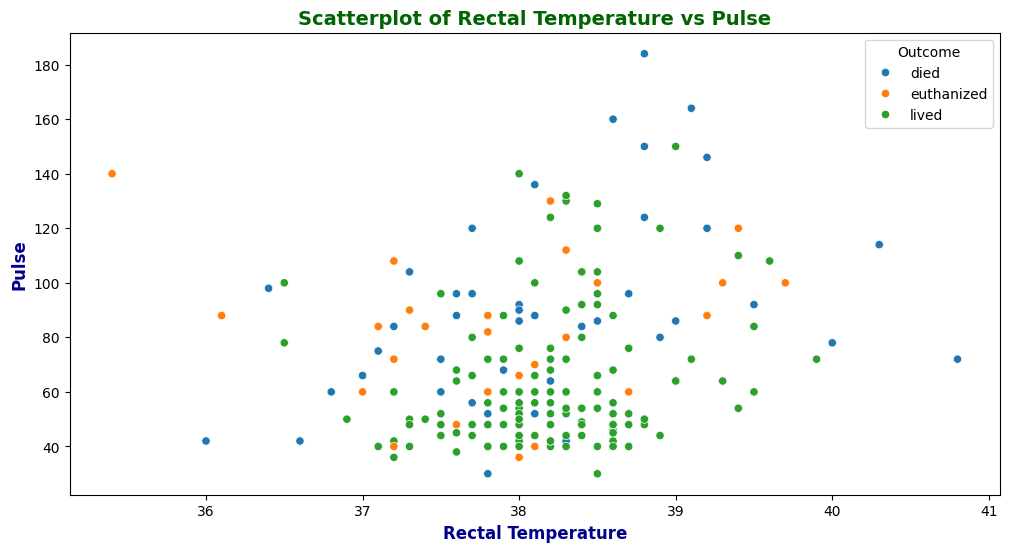

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rectal_temp', y='pulse', hue='outcome', data=data)
plt.title('Scatterplot of Rectal Temperature vs Pulse', fontsize=14, fontweight='bold',color = 'darkgreen')
plt.xlabel('Rectal Temperature', fontsize=12, fontweight='bold',color = 'darkblue')
plt.ylabel('Pulse', fontsize=12, fontweight='bold',color = 'darkblue')
plt.legend(title='Outcome', fontsize=10)
plt.savefig('Scatterplot of Rectal Temperature vs Pulse.png')
plt.show()

In [16]:
# plt.scatter(x_train['rectal_temp'], x_train['total_protein'])
# plt.xlabel('rectal temprature')
# plt.ylabel('total protein')
# plt.show()

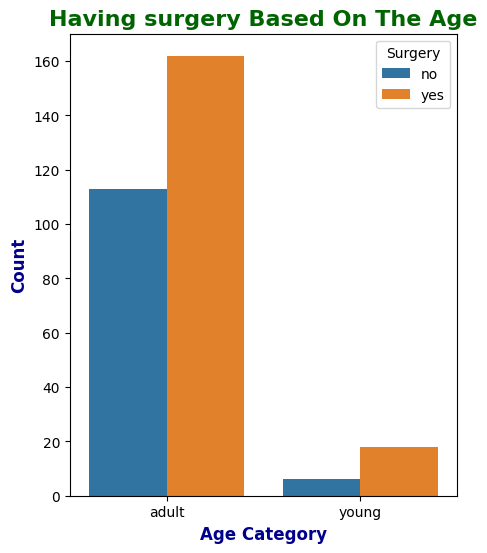

In [17]:
plt.figure(figsize=(5, 6))
sns.countplot(x='age', hue='surgery', data=data)
plt.title('Having surgery Based On The Age', fontsize = 16, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Age Category', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(title='Surgery')
# plt.savefig('Surgery Outcomes by Age Category.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


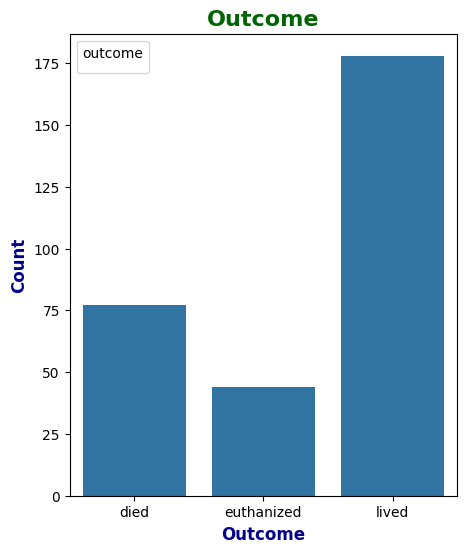

In [18]:
plt.figure(figsize=(5, 6))
sns.countplot(x='outcome', data=data)
plt.title('Outcome', fontsize = 16, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Outcome', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(title='outcome')
# plt.savefig('Surgery Outcomes by Age Category.png')
plt.show()

## Data Preprocessing

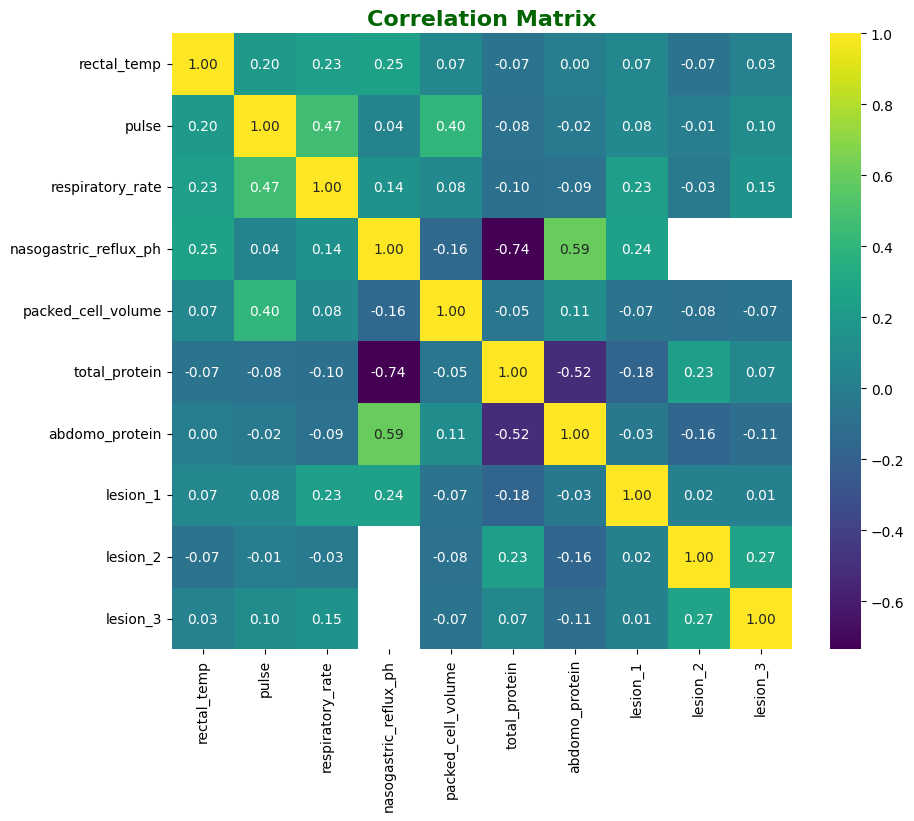

In [19]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = x_train.select_dtypes(include=['number']).columns
correlation_matrix = x_train[numeric_cols].corr()

# Increase the size of the figure
plt.figure(figsize=(10, 8))

# Create heatmap with adjusted font size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', annot_kws={"size": 10})

# Add title
plt.title('Correlation Matrix', fontsize=16, fontweight='bold',color = 'darkgreen')

plt.savefig('Correlation Matrix.png')
# Show plot
plt.show()

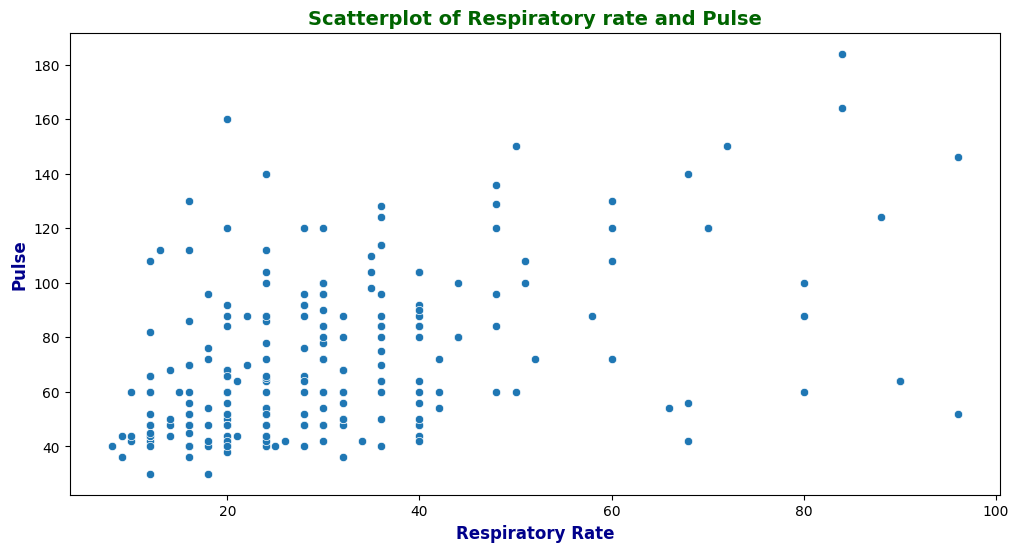

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='respiratory_rate', y='pulse', data=data)
plt.title('Scatterplot of Respiratory rate and Pulse', fontsize=14, fontweight='bold',color = 'darkgreen')
plt.xlabel('Respiratory Rate', fontsize=12, fontweight='bold',color = 'darkblue')
plt.ylabel('Pulse', fontsize=12, fontweight='bold',color = 'darkblue')
# plt.legend(title='Outcome', fontsize=10)
# plt.savefig('Scatterplot of Respiratory Rate vs Pulse.png')
plt.show()

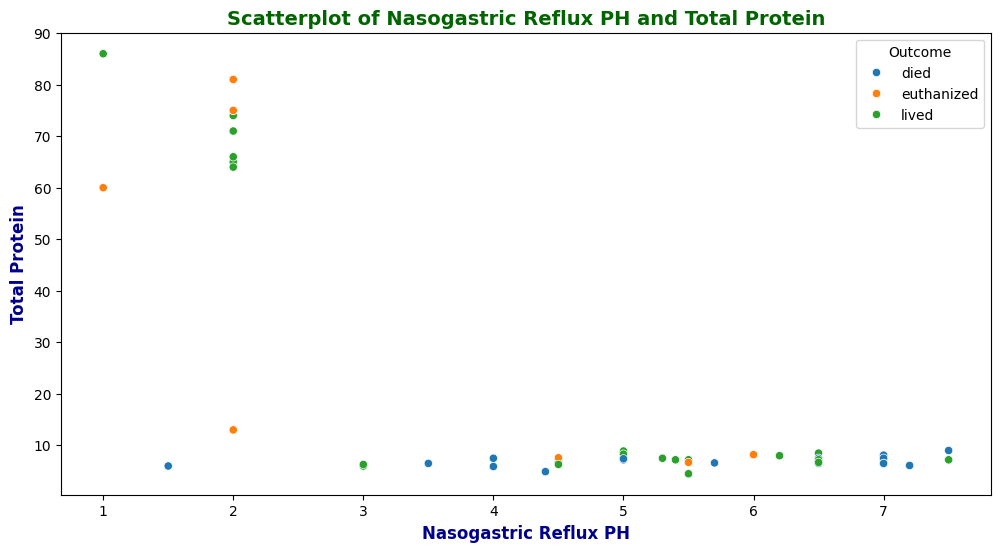

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nasogastric_reflux_ph', y='total_protein', hue='outcome', data=data)
plt.title('Scatterplot of Nasogastric Reflux PH and Total Protein', fontsize=14, fontweight='bold',color = 'darkgreen')
plt.xlabel('Nasogastric Reflux PH', fontsize=12, fontweight='bold',color = 'darkblue')
plt.ylabel('Total Protein', fontsize=12, fontweight='bold',color = 'darkblue')
plt.legend(title='Outcome', fontsize=10)
# plt.savefig('Scatterplot of 'Nasogastric Reflux PH vs Pulse.png')
plt.show()

### Dealing with missing values:

In [22]:
x_test.select_dtypes(include=['int64', 'float64']).isnull().sum()

rectal_temp               7
pulse                     2
respiratory_rate          4
nasogastric_reflux_ph    25
packed_cell_volume        5
total_protein             6
abdomo_protein           20
lesion_1                  0
lesion_2                  0
lesion_3                  0
dtype: int64

In [23]:
def miss_handler(data):
    imputer = SimpleImputer(strategy='most_frequent')
    data = pd.DataFrame(
        imputer.fit_transform(data), columns=data.columns
    ).astype(data.dtypes.to_dict())

    return data

In [24]:
x_train = miss_handler(x_train)
x_test = miss_handler(x_test)

### Encoding the categorical data and scaling the numerical data:

In [27]:
num_feat = x_train.select_dtypes(include=['float64', 'int64'])


ordinal_categories = {
    'peripheral_pulse': ['normal', 'increased', 'reduced', 'absent'],
    'capillary_refill_time': ['more_3_sec', '3', 'less_3_sec'],
    'peristalsis': ['hypomotile', 'normal', 'hypermotile', 'absent'],
    'abdominal_distention': ['none', 'slight', 'moderate', 'severe'],
    'nasogastric_tube': ['none', 'slight', 'significant'],
    'nasogastric_reflux': ['none', 'less_1_liter', 'more_1_liter'],
    'rectal_exam_feces': ['normal', 'increased', 'decreased', 'absent'],
    'abdomen': ['normal', 'other', 'firm', 'distend_small', 'distend_large'],
    'abdomo_appearance': ['clear', 'cloudy', 'serosanguious']
}


nominal_cats = ['temp_of_extremities', 'mucous_membrane', 'pain']


class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)


class OrdinalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_categories):
        self.ordinal_categories = ordinal_categories
        self.ordinal_encoder = OrdinalEncoder(categories=[self.ordinal_categories[f] for f in self.ordinal_categories])

    def fit(self, X, y=None):
        return self.ordinal_encoder.fit(X)

    def transform(self, X):
        return self.ordinal_encoder.transform(X)


class NominalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.onehot_encoder = OneHotEncoder(drop='first')

    def fit(self, X, y=None):
        return self.onehot_encoder.fit(X)

    def transform(self, X):
        return self.onehot_encoder.transform(X)


train_preprocessor = ColumnTransformer(
    transformers=[
        ('num', NumericalTransformer(), num_feat.columns),  # StandardScaler for numerical features
        ('ord', OrdinalTransformer(ordinal_categories), list(ordinal_categories.keys())),  # ordinal transformer
        ('nom', NominalTransformer(), nominal_cats)  # nominal transformer
    ]
)

test_preprocessor = ColumnTransformer(
    transformers=[
        ('num', NumericalTransformer(), num_feat.columns),
        ('ord', OrdinalTransformer(ordinal_categories), list(ordinal_categories.keys())),
        ('nom', NominalTransformer(), nominal_cats)
    ]
)


train_pipeline = Pipeline(steps=[('preprocessor', train_preprocessor)])
test_pipeline = Pipeline(steps=[('preprocessor', test_preprocessor)])


In [28]:
x_train_transformed = train_pipeline.fit_transform(x_train)
x_test_transformed = test_pipeline.fit_transform(x_test)
num_ord_feature_names = (list(make_column_selector(dtype_include=['float64', 'int64'])(x_train)) +
                         list(ordinal_categories.keys()))


nom_feature_names = []
nominal_encoder = train_pipeline.named_steps['preprocessor'].transformers_[2][1].onehot_encoder
for i, col in enumerate(nominal_cats):
    categories = nominal_encoder.categories_[i][1:]
    nom_feature_names.extend([f'{col}_{cat}' for cat in categories])

feature_names = num_ord_feature_names + nom_feature_names

x_train_transformed = pd.DataFrame(x_train_transformed, columns=feature_names)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names)

In [29]:
x_train_transformed

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,temp_of_extremities_warm,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain
0,-0.234521,-0.592235,0.027347,-0.359030,-0.065322,-0.621231,-0.287231,-0.644911,-0.147097,-0.061085,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.994594,0.035524,0.027347,-0.359030,1.374983,-0.598783,-0.287231,-0.035403,-0.147097,-0.061085,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.386535,-1.080491,-0.340473,-0.359030,-0.545424,-0.639937,-0.287231,-0.644911,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.538550,0.384278,-1.076115,-0.359030,0.414779,-0.591301,-0.287231,-0.252697,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.842579,0.593531,0.395168,-0.735703,-0.161343,-0.628713,-0.287231,-0.427618,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1.589655,-0.801487,-0.401777,-0.359030,-0.929505,-0.606266,0.495597,-0.054960,-0.147097,-0.061085,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
265,-0.994594,0.035524,-0.340473,-0.359030,-1.025526,1.578633,-0.287231,0.834639,-0.147097,-0.061085,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
266,-0.690565,-0.522484,-0.340473,-0.359030,-0.833485,-0.610007,-0.287231,-0.272688,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
267,0.069509,-1.010740,-0.217867,-0.359030,-0.929505,-0.595042,-0.287231,-0.055829,-0.147097,-0.061085,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
x_test_transformed

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,...,temp_of_extremities_warm,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain
0,-0.809235,-0.127498,-0.427979,-0.351307,-0.780763,-0.495127,-0.257538,-0.298145,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.809235,-0.127498,-0.427979,-0.351307,-0.780763,-0.495127,-0.257538,-0.430423,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.526944,0.992000,0.802140,-0.351307,-0.780763,-0.495127,-0.257538,0.096721,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.319930,-0.873830,-1.043038,3.229976,-1.126915,-0.517632,-0.257538,-0.421612,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.037639,-1.060413,-1.043038,-0.351307,-0.549996,-0.495127,-0.257538,-0.328105,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.743367,-0.127498,-0.427979,-0.351307,-1.011531,2.160552,-0.257538,-0.650611,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.449095,4.070619,1.878493,-0.351307,0.834609,-0.531136,-0.257538,-0.214486,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.037639,1.178583,-0.274214,-0.351307,2.449982,-0.450115,4.647946,-0.318360,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.037639,-0.687247,-1.043038,-0.351307,-0.665380,-0.562644,-1.115998,-0.223298,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,-0.385798,-0.687247,1.109669,-0.351307,-0.203845,1.665426,-0.257538,-0.421715,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
def comparator(x_train, y_train, x_test, y_test):
    histories = dict()
    for i in range(5):
        c = random.random()
        gamma = random.random()
        clf = SVC(C = c, kernel='linear', gamma=gamma)
        clf.fit(x_train, y_train)
        # print(f'step counter: {i}')
        train_acc = clf.score(x_train, y_train)
        test_acc = clf.score(x_test, y_test)
        histories[f'clf{i}'] = [train_acc, test_acc, c, gamma, clf]
        # print(f'histories is: {histories}')
    return histories

In [64]:
score_history = comparator(x_train_transformed, y_train, x_test_transformed, y_test)

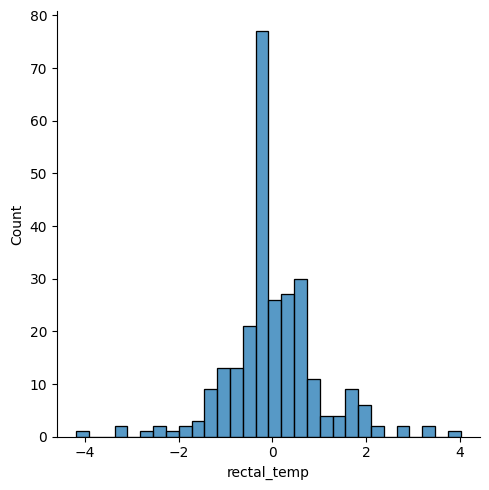

In [65]:
sns.displot(x_train_transformed, x='rectal_temp')

In [66]:
counter = 0
for item in score_history:
    print(f'clf{counter}:\nthe train accuracy is: {score_history[item][0]}, the test accuracy is: {score_history[item][1]}\nc is: {score_history[item][2]} and gamma is: {score_history[item][3]}')
    print('-----------------------------------------------------')
    counter += 1

clf0:
the train accuracy is: 0.6059479553903345, the test accuracy is: 0.5
c is: 0.004676416274934203 and gamma is: 0.9383635562426044
-----------------------------------------------------
clf1:
the train accuracy is: 0.7806691449814126, the test accuracy is: 0.7666666666666667
c is: 0.6147512260738467 and gamma is: 0.9276986130222048
-----------------------------------------------------
clf2:
the train accuracy is: 0.7769516728624535, the test accuracy is: 0.8
c is: 0.5043156972458682 and gamma is: 0.3079524150758117
-----------------------------------------------------
clf3:
the train accuracy is: 0.7806691449814126, the test accuracy is: 0.7666666666666667
c is: 0.355870590747128 and gamma is: 0.982294945769155
-----------------------------------------------------
clf4:
the train accuracy is: 0.7843866171003717, the test accuracy is: 0.7666666666666667
c is: 0.6032951832119516 and gamma is: 0.862445417867909
-----------------------------------------------------
